In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path='/content/drive/MyDrive/df/ventas_tienda_uncleaned.csv'

In [3]:
df= pd.read_csv(csv_path)

In [4]:
df_original=df.copy()

In [5]:
df.head()

,id,fecha,producto,categoria,precio,cantidad,total_venta,metodo_pago,cliente_id
0,237e1527-1da3-4324-ad7a-0d6e2aaa78bb,2024-04-28,Cortinas,Hogar,475.60,8.0,3804.80,Efectivo,6734
1,102e4fff-13cc-4c3e-bcf2-0d6275e8051e,2024-04-29,Zapatos,Ropa,54.49,8.0,NaN,Efectivo,9322
2,a45466d2-fd0f-48de-8414-b88588b2dcab,2024-07-07,Gorra,Ropa,485.11,6.0,2910.66,Tarjeta,6311
3,445f1789-04b9-4e0d-b6cc-35de34c7a04b,2025-02-14,Celular,Electronica,NaN,6.0,933.60,Efectivo,9666
4,bcdba7ad-703c-4a74-a482-4ecf68544f9c,2024-08-22,Silla,Hogar,28.10,3.0,84.30,Transferencia,2267


1.ANALISIS INICIAL DE DATOS

1.1 RESUMEN DEL DATA SET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1050 non-null   object 
 1   fecha        1050 non-null   object 
 2   producto     1050 non-null   object 
 3   categoria    1050 non-null   object 
 4   precio       950 non-null    float64
 5   cantidad     948 non-null    float64
 6   total_venta  949 non-null    float64
 7   metodo_pago  1050 non-null   object 
 8   cliente_id   1050 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 74.0+ KB


In [7]:
df['fecha']= pd.to_datetime(df['fecha'])

In [8]:
df= df.drop('id',axis=1)

In [9]:
df.describe()

,fecha,precio,cantidad,total_venta,cliente_id
count,1050,950.000000,948.000000,949.000000,1050.000000
mean,2024-09-17 08:54:51.428571392,346.616663,6.439873,3485.149505,5415.112381
min,2024-03-10 00:00:00,-269.200000,1.000000,11.800000,1002.000000
25%,2024-06-13 06:00:00,124.080000,3.000000,452.100000,3032.500000
50%,2024-09-25 00:00:00,263.705000,6.000000,1125.180000,5483.500000
75%,2024-12-19 18:00:00,392.030000,8.000000,2198.000000,7613.500000
max,2025-03-10 00:00:00,4997.700000,50.000000,99890.000000,9996.000000
std,NaN,700.534368,6.980859,14200.392640,2585.584327


In [10]:
df.columns

Index(['fecha', 'producto', 'categoria', 'precio', 'cantidad', 'total_venta',
       'metodo_pago', 'cliente_id'],
      dtype='object')

In [11]:
df.shape

(1050, 8)

1.2 VISUALIZACION DE VALORES NULOS

In [12]:
df.isnull().sum()

,0
fecha,0
producto,0
categoria,0
precio,100
cantidad,102
total_venta,101
metodo_pago,0
cliente_id,0


1.3 DATOS DUPLICADOS

In [13]:
df.duplicated().sum()

np.int64(42)

In [14]:
df= df.drop_duplicates()

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isnull().sum()

,0
fecha,0
producto,0
categoria,0
precio,97
cantidad,98
total_venta,97
metodo_pago,0
cliente_id,0


In [17]:
!pip install scikit-learn

#2. IMPUTACION**
2.1 Imputacion Simple

In [18]:
df['producto'].value_counts()

,count
producto,
Audifonos,79
Chaqueta,78
Celular,77
Pantalon,71
Almohada,71
Tablet,71
Gorra,70
Camisa,65
Lampara,64


In [19]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='mean')
df['precio'] = imputer.fit_transform(df[['precio']])

In [20]:
from sklearn.impute import SimpleImputer

# Función para imputar por grupo
def imputar_por_grupo(df, columna, agrupacion, imputer):
    # Agrupar por la columna de agrupación
    grouped = df.groupby(agrupacion)

    # Aplicar la imputación por cada grupo
    for name, group in grouped:
        # Imputar solo en la columna que tiene valores faltantes
        df.loc[group.index, columna] = imputer.fit_transform(group[[columna]])

    return df

In [21]:
imputer= SimpleImputer(strategy='mean')
df_imputado = imputar_por_grupo(df,'precio', 'producto', imputer)

In [22]:
df_imputado

,fecha,producto,categoria,precio,cantidad,total_venta,metodo_pago,cliente_id
0,2024-04-28,Cortinas,Hogar,475.600000,8.0,3804.80,Efectivo,6734
1,2024-04-29,Zapatos,Ropa,54.490000,8.0,NaN,Efectivo,9322
2,2024-07-07,Gorra,Ropa,485.110000,6.0,2910.66,Tarjeta,6311
3,2025-02-14,Celular,Electronica,350.323732,6.0,933.60,Efectivo,9666
4,2024-08-22,Silla,Hogar,28.100000,3.0,84.30,Transferencia,2267
...,...,...,...,...,...,...,...,...
1010,2024-05-29,Gorra,Ropa,284.880000,9.0,99890.00,Tarjeta,1717
1014,2024-10-25,Gorra,Ropa,147.170000,8.0,1177.36,Transferencia,8533
1021,2025-02-18,Gorra,Ropa,457.850000,50.0,457.85,Efectivo,5757
1037,2024-04-16,Zapatos,Ropa,249.860000,9.0,99890.00,Efectivo,5422


In [23]:
df['cantidad']= df.groupby('producto')['cantidad'].transform(lambda x: x.fillna(x.mean()))

In [24]:
df_imputado = imputar_por_grupo(df, 'total_venta', 'producto', SimpleImputer(strategy='mean'))

In [25]:
df_imputado.head()

,fecha,producto,categoria,precio,cantidad,total_venta,metodo_pago,cliente_id
0,2024-04-28,Cortinas,Hogar,475.600000,8.0,3804.800000,Efectivo,6734
1,2024-04-29,Zapatos,Ropa,54.490000,8.0,7304.554082,Efectivo,9322
2,2024-07-07,Gorra,Ropa,485.110000,6.0,2910.660000,Tarjeta,6311
3,2025-02-14,Celular,Electronica,350.323732,6.0,933.600000,Efectivo,9666
4,2024-08-22,Silla,Hogar,28.100000,3.0,84.300000,Transferencia,2267


3. DETECCION  DE VALORES ATIPICOS

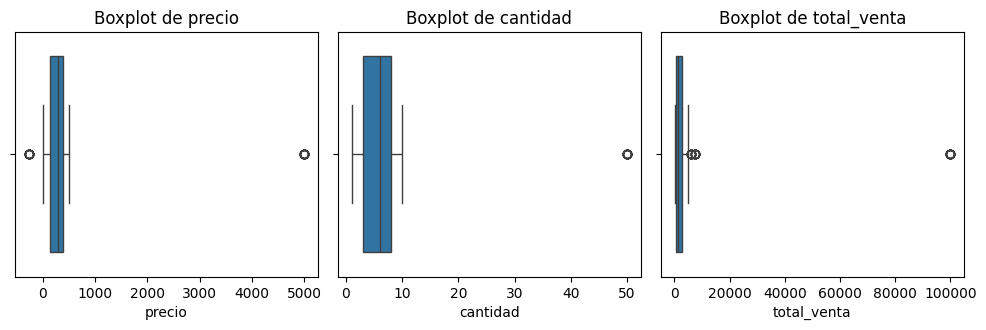

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
columnas_numericas = ['precio', 'cantidad', 'total_venta']
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

In [27]:
# funcion intercuartil para eliminar ouliers
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df

In [28]:
df= eliminar_outliers(df,'precio')

In [30]:
df= eliminar_outliers(df,'cantidad')
df= eliminar_outliers(df,'total_venta')

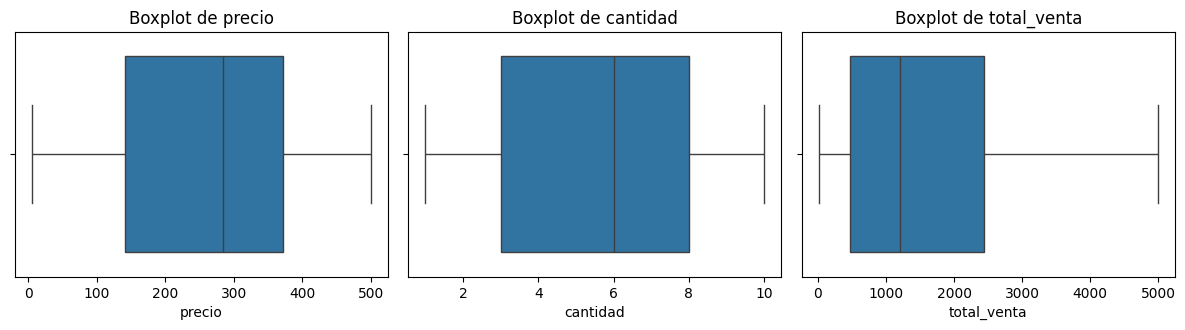

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
columnas_numericas =['precio', 'cantidad', 'total_venta']
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

#4. NORMALIZACION

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
df[['precio_normalizado','cantidad_normalizado','total_venta_normalizado']]= scaler.fit_transform(df[['precio','cantidad','total_venta']])

In [33]:
df.head()

,fecha,producto,categoria,precio,cantidad,total_venta,metodo_pago,cliente_id,precio_normalizado,cantidad_normalizado,total_venta_normalizado
0,2024-04-28,Cortinas,Hogar,475.600000,8.0,3804.80,Efectivo,6734,0.951148,0.777778,0.761234
2,2024-07-07,Gorra,Ropa,485.110000,6.0,2910.66,Tarjeta,6311,0.970369,0.555556,0.581785
3,2025-02-14,Celular,Electronica,350.323732,6.0,933.60,Efectivo,9666,0.697942,0.555556,0.185000
4,2024-08-22,Silla,Hogar,28.100000,3.0,84.30,Transferencia,2267,0.046669,0.222222,0.014550
5,2024-12-18,Tablet,Electronica,430.670000,7.0,3014.69,Efectivo,6393,0.860336,0.666667,0.602663


Vista antes de la Normalizacion

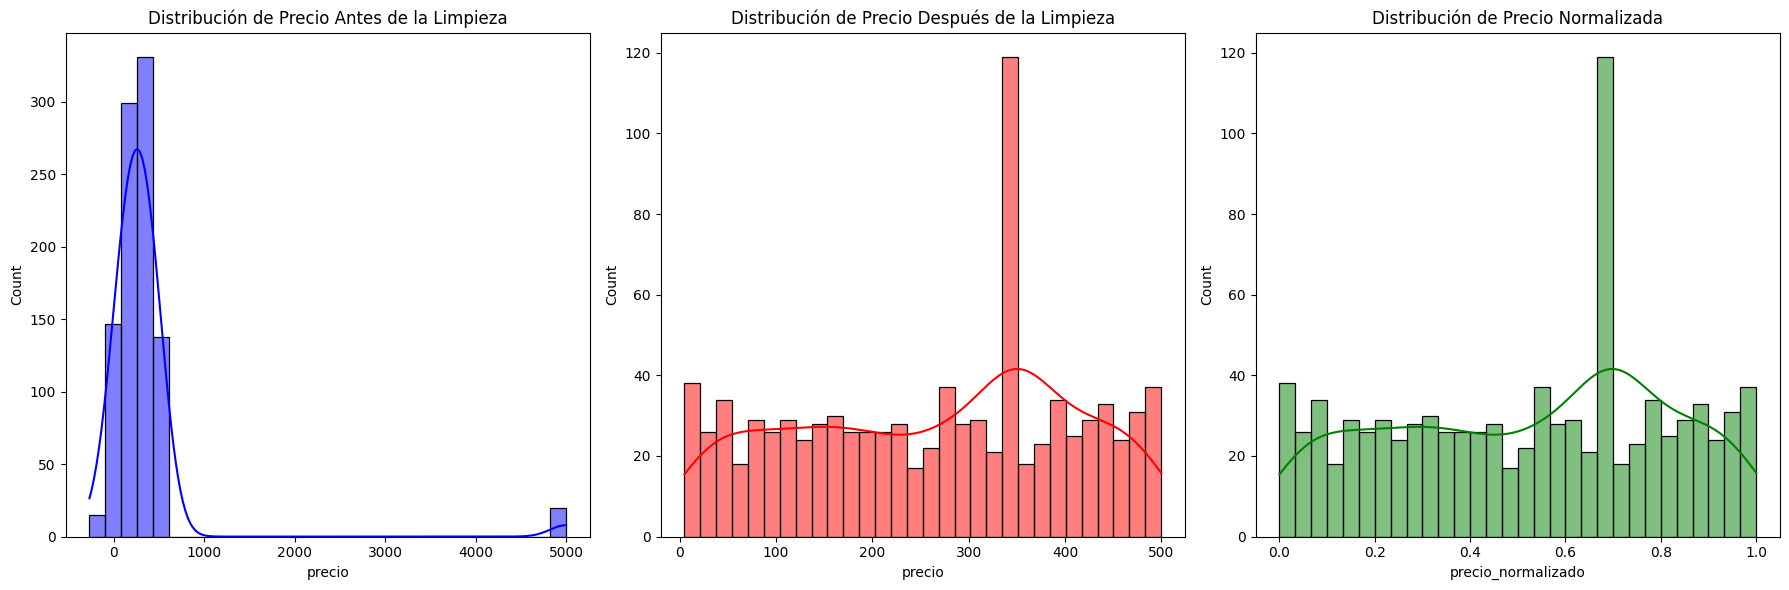

In [37]:
plt.figure(figsize=(18, 6))  # Ajustamos el tamaño para acomodar 3 gráficos

# Antes de la limpieza
plt.subplot(1, 3, 1)
sns.histplot(df_original["precio"], bins=30, kde=True, color="blue")
plt.title("Distribución de Precio Antes de la Limpieza")

# Después de la limpieza
plt.subplot(1, 3, 2)
sns.histplot(df["precio"], bins=30, kde=True, color="red")
plt.title("Distribución de Precio Después de la Limpieza")

# Después de la normalización
plt.subplot(1, 3, 3)
sns.histplot(df["precio_normalizado"], bins=30, kde=True, color="green")
plt.title("Distribución de Precio Normalizada")

plt.tight_layout()  # Ajusta los gráficos para que no se sobrepongan
plt.show()

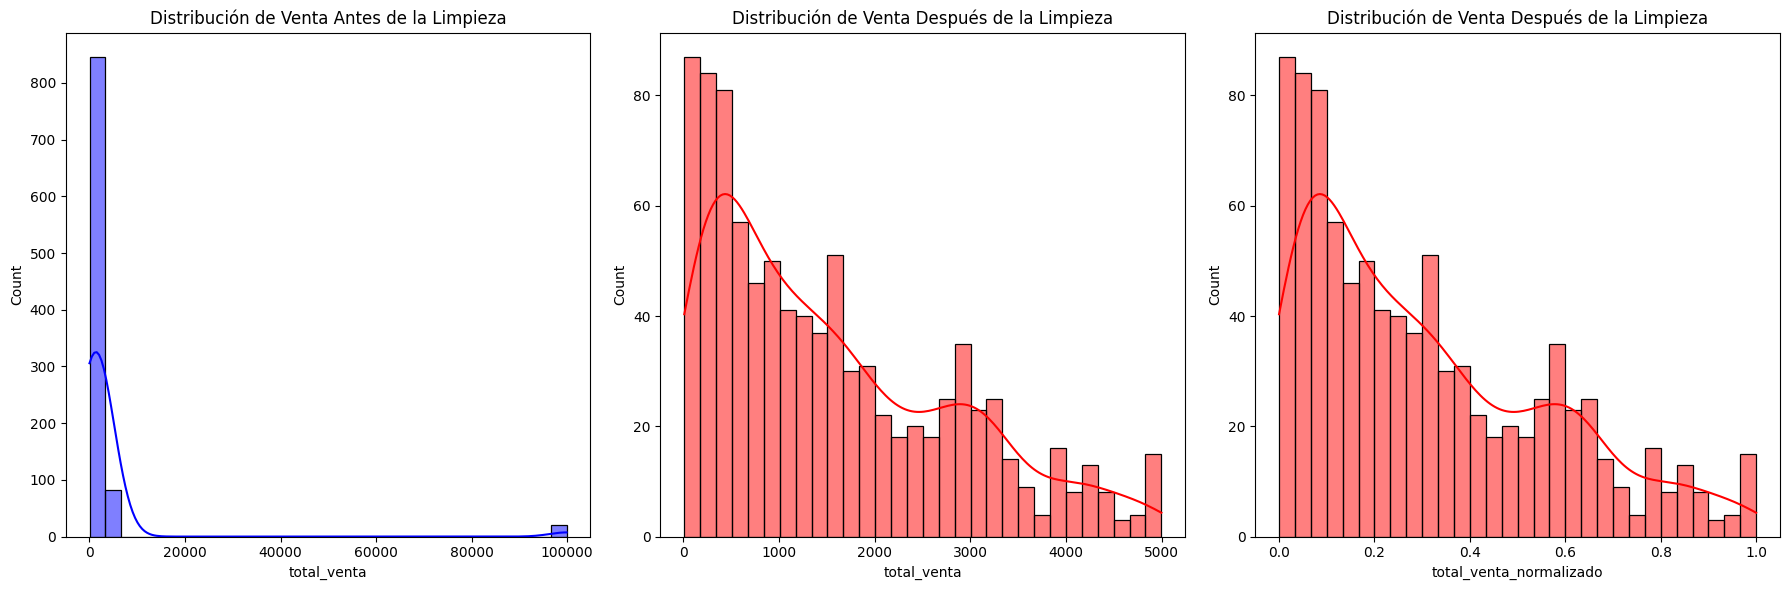

In [38]:
plt.figure(figsize=(18, 6))

# Antes de la limpieza
plt.subplot(1, 3, 1)
sns.histplot(df_original["total_venta"], bins=30, kde=True, color="blue")
plt.title("Distribución de Venta Antes de la Limpieza")

# Después de la limpieza
plt.subplot(1, 3, 2)
sns.histplot(df["total_venta"], bins=30, kde=True, color="red")
plt.title("Distribución de Venta Después de la Limpieza")

# Después de la limpieza
plt.subplot(1, 3, 3)
sns.histplot(df["total_venta_normalizado"], bins=30, kde=True, color="red")
plt.title("Distribución de Venta Después de la Limpieza")

plt.tight_layout()
plt.show()

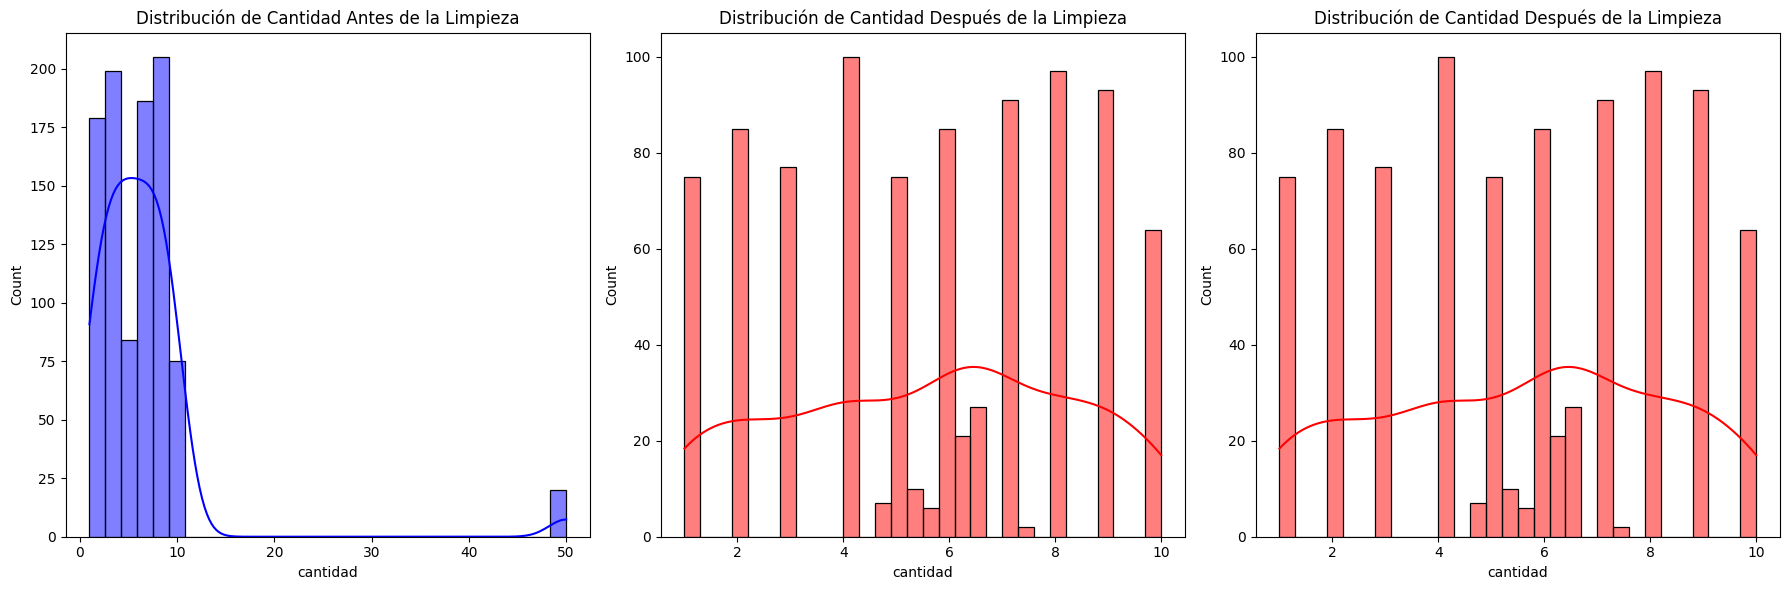

In [39]:
plt.figure(figsize=(18, 6))

# Antes de la limpieza
plt.subplot(1, 3, 1)
sns.histplot(df_original["cantidad"], bins=30, kde=True, color="blue")
plt.title("Distribución de Cantidad Antes de la Limpieza")

# Después de la limpieza
plt.subplot(1, 3, 2)
sns.histplot(df["cantidad"], bins=30, kde=True, color="red")
plt.title("Distribución de Cantidad Después de la Limpieza")

# Después de la limpieza
plt.subplot(1, 3, 3)
sns.histplot(df["cantidad"], bins=30, kde=True, color="red")
plt.title("Distribución de Cantidad Después de la Limpieza")

plt.tight_layout()
plt.show()

Escalarizacion

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['precio_escalado', 'cantidad_escalado', 'total_venta_escalado']] = scaler.fit_transform(df[['precio', 'cantidad', 'total_venta']])

In [41]:
df.head()

,fecha,producto,categoria,precio,cantidad,total_venta,metodo_pago,cliente_id,precio_normalizado,cantidad_normalizado,total_venta_normalizado,precio_escalado,cantidad_escalado,total_venta_escalado
0,2024-04-28,Cortinas,Hogar,475.600000,8.0,3804.80,Efectivo,6734,0.951148,0.777778,0.761234,1.483550,0.902837,1.781271
2,2024-07-07,Gorra,Ropa,485.110000,6.0,2910.66,Tarjeta,6311,0.970369,0.555556,0.581785,1.549986,0.158930,1.076061
3,2025-02-14,Celular,Electronica,350.323732,6.0,933.60,Efectivo,9666,0.697942,0.555556,0.185000,0.608378,0.158930,-0.483251
4,2024-08-22,Silla,Hogar,28.100000,3.0,84.30,Transferencia,2267,0.046669,0.222222,0.014550,-1.642655,-0.956930,-1.153096
5,2024-12-18,Tablet,Electronica,430.670000,7.0,3014.69,Efectivo,6393,0.860336,0.666667,0.602663,1.169672,0.530884,1.158109


#5. MATRIZ DE CORRELACION

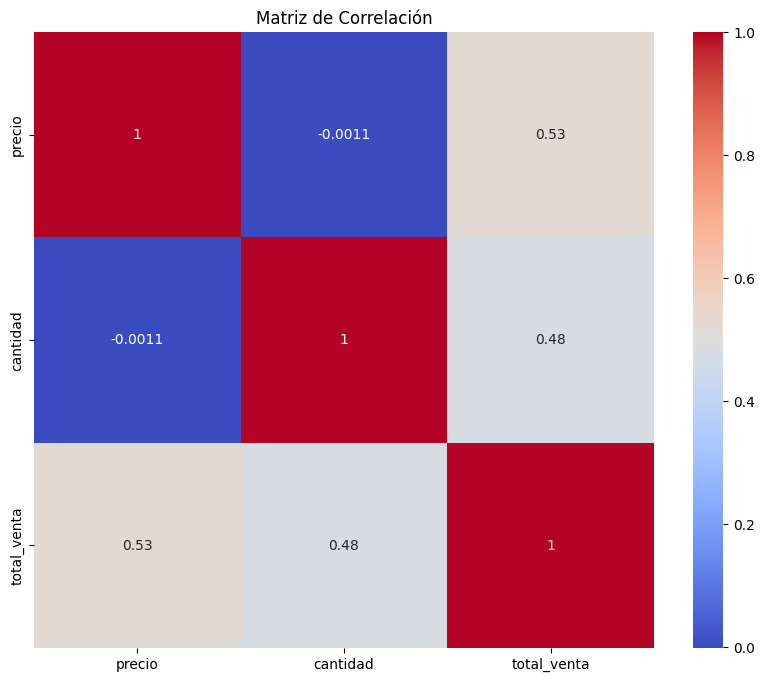

In [42]:
df_num = df[['precio','cantidad','total_venta']]
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

6. TRANSFORMACION DE DATOS CATEGORICOS

In [43]:
df.head()

,fecha,producto,categoria,precio,cantidad,total_venta,metodo_pago,cliente_id,precio_normalizado,cantidad_normalizado,total_venta_normalizado,precio_escalado,cantidad_escalado,total_venta_escalado
0,2024-04-28,Cortinas,Hogar,475.600000,8.0,3804.80,Efectivo,6734,0.951148,0.777778,0.761234,1.483550,0.902837,1.781271
2,2024-07-07,Gorra,Ropa,485.110000,6.0,2910.66,Tarjeta,6311,0.970369,0.555556,0.581785,1.549986,0.158930,1.076061
3,2025-02-14,Celular,Electronica,350.323732,6.0,933.60,Efectivo,9666,0.697942,0.555556,0.185000,0.608378,0.158930,-0.483251
4,2024-08-22,Silla,Hogar,28.100000,3.0,84.30,Transferencia,2267,0.046669,0.222222,0.014550,-1.642655,-0.956930,-1.153096
5,2024-12-18,Tablet,Electronica,430.670000,7.0,3014.69,Efectivo,6393,0.860336,0.666667,0.602663,1.169672,0.530884,1.158109


In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder= OneHotEncoder(sparse_output=False)
encoded= encoder.fit_transform(df[['categoria']])
encoded_df= pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['categoria']))
df_sklearn= pd.concat([df,encoded_df], axis=1)

df_sklearn.head()


,fecha,producto,categoria,precio,cantidad,total_venta,metodo_pago,cliente_id,precio_normalizado,cantidad_normalizado,total_venta_normalizado,precio_escalado,cantidad_escalado,total_venta_escalado,categoria_Electronica,categoria_Hogar,categoria_Ropa
0,2024-04-28,Cortinas,Hogar,475.600000,8.0,3804.80,Efectivo,6734.0,0.951148,0.777778,0.761234,1.483550,0.902837,1.781271,0.0,1.0,0.0
2,2024-07-07,Gorra,Ropa,485.110000,6.0,2910.66,Tarjeta,6311.0,0.970369,0.555556,0.581785,1.549986,0.158930,1.076061,1.0,0.0,0.0
3,2025-02-14,Celular,Electronica,350.323732,6.0,933.60,Efectivo,9666.0,0.697942,0.555556,0.185000,0.608378,0.158930,-0.483251,0.0,1.0,0.0
4,2024-08-22,Silla,Hogar,28.100000,3.0,84.30,Transferencia,2267.0,0.046669,0.222222,0.014550,-1.642655,-0.956930,-1.153096,1.0,0.0,0.0
5,2024-12-18,Tablet,Electronica,430.670000,7.0,3014.69,Efectivo,6393.0,0.860336,0.666667,0.602663,1.169672,0.530884,1.158109,1.0,0.0,0.0


/tmp/ipython-input-111042381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=palette, ax=axes[i])
/tmp/ipython-input-111042381.py:15: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=df, palette=palette, ax=axes[i])
/tmp/ipython-input-111042381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=palette, ax=axes[i])
/tmp/ipython-input-111042381.py:15: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x=col, data=df, palette=palette, ax=axes[i])
/tmp/ipython-input-11104

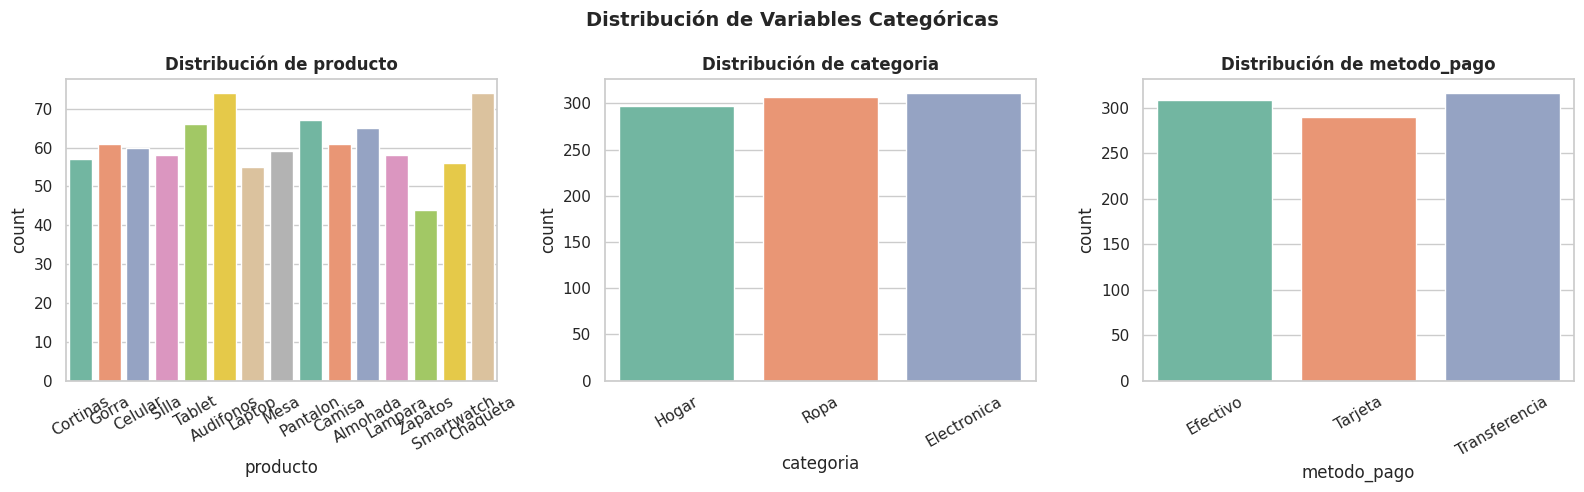

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas
cat_vars = ["producto", "categoria", "metodo_pago"]

# Definir estilo y paleta de colores
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")

# Crear subplots dinámicos
fig, axes = plt.subplots(1, len(cat_vars), figsize=(16, 5))

for i, col in enumerate(cat_vars):
    sns.countplot(x=col, data=df, palette=palette, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}", fontsize=12, fontweight="bold")
    axes[i].tick_params(axis='x', rotation=30)

plt.suptitle("Distribución de Variables Categóricas", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

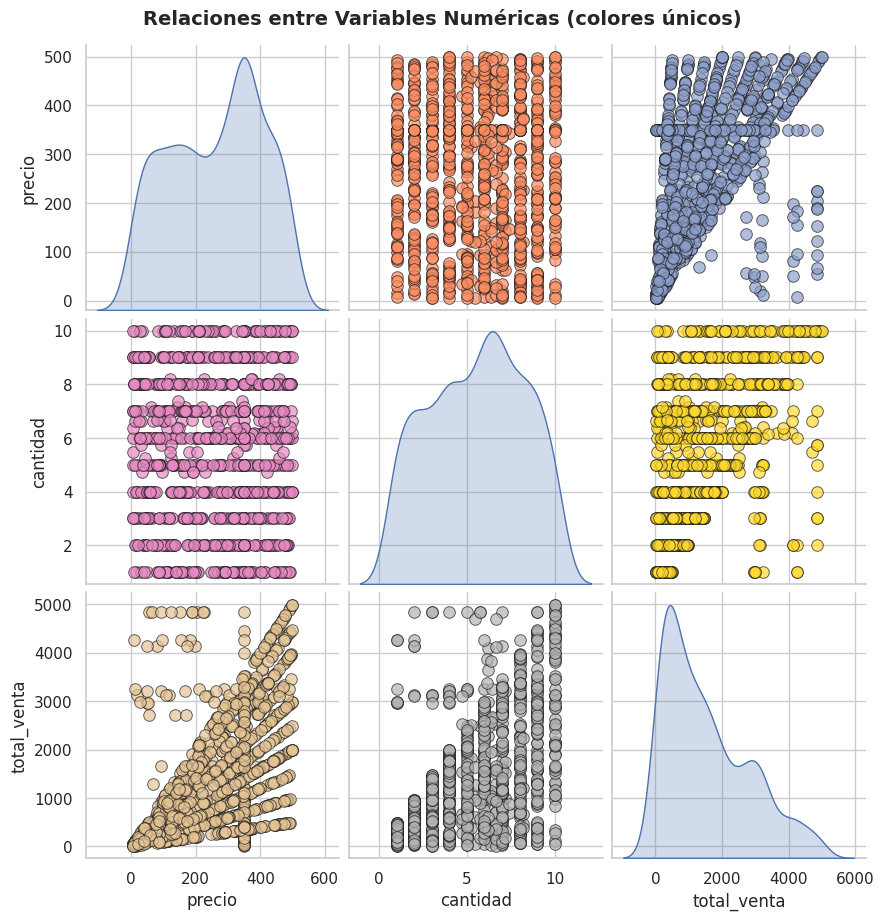

In [49]:

# Variables numéricas
num_vars = ['precio', 'cantidad', 'total_venta']

# Crear pairplot
g = sns.pairplot(
    df[num_vars],
    diag_kind="kde",
    kind="scatter",
    plot_kws={"alpha":0.7, "s":70, "edgecolor":"k"},
    height=3
)

# Lista de colores (tantos como subplots)
colors = sns.color_palette("Set2", len(num_vars)**2)

# Asignar un color distinto a cada subplot
for (i, j), ax in np.ndenumerate(g.axes):
    if ax is not None:
        color = colors[i*len(num_vars) + j]
        for artist in ax.collections:   # cambia puntos
            artist.set_facecolor(color)
        for line in ax.lines:           # cambia líneas kde
            line.set_color(color)

# Título general
g.fig.suptitle("Relaciones entre Variables Numéricas (colores únicos)",
               y=1.02, fontsize=14, fontweight="bold")

plt.show()

In [51]:
df.to_csv('ventas_cleaned.csv',index=False)